In [14]:
import sys
sys.path.append('/import/silo2/aloe8475/Documents/edamame')

In [15]:
from edamame import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import pickle 
import _pickle as cPickle
import gzip
from IPython.core.debugger import set_trace
import bct
import pandas as pd

In [16]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [17]:
def compressed_pickle(obj, filename,protocol=-1):
    with gzip.open(filename, 'wb') as f:
        cPickle.dump(obj, f, protocol)
def decompress_pickle(file):
    with gzip.open(file, 'rb') as f:
        loaded_object = cPickle.load(f,encoding="bytes") #change this for python 2
        return loaded_object

In [ ]:
name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/300nw_2_modules_10sets_NWN.pkl'
name2='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/300nw_2_modules_separated_10sets_NWN.pkl'
# name300='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/VaryingDensity300NWset2_NWN.pkl'
# print('Loading NWN Networks, MC and NLT Results')
# file = open(name300, 'rb')
# [NWN] = pickle.load(file)
# file = open(na2e, 'rb')
# [Modular] = pickle.load(file)
# Modular_separate=decompress_pickle(name2)
Modular=decompress_pickle(name)

In [19]:
onAmp=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,3,5,10]

In [20]:
dataLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/ModularNWNs/VSweep/'
dataLoc300='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VSweep/'
saveFig='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'

In [ ]:
# #save networks separately so Dask can run it more efficiently
# count = 1
# for i in tqdm(range(len(Modular_separate))):#For each network
# #     for j in range(len(Modular[i])): #for each density
#     n1=connectivity__(wires_dict=Modular_separate[i][0][0])
#     n2=connectivity__(wires_dict=Modular_separate[i][0][1])
#     compressed_pickle((n1,n2),dataLoc+'/NWN_Network_2modules_separated_10sets_'+str(i+1)+'.pkl')
#     count = count+1

In [9]:
# #save networks separately so Dask can run it more efficiently
# count = 1
# for i in tqdm(range(len(Modular))):#For each network
#     for j in range(len(Modular[i])): #for each density
#         n=connectivity__(wires_dict=Modular[i][j])
#         compressed_pickle(n,dataLoc+'/NWN_Network_9modules_10sets_'+str(i+1)+'_'+str(j+1)+'.pkl')
#         count = count+1

In [9]:
#2 Modules manual Electrode Placement
electrodes=np.array(([73,115,255,224],[107,129,229,282],[123,147,194,241],[149,128,228,217],[128,46,183,247],[4,137,249,282],[81,131,183,214],[122,121,187,186],[113,50,211,171],[98,85,211,258]))
electrodes_separate=np.array(([73,115,255-150,224-150],[107,129,229-150,282-150],[123,147,194-150,241-150],[149,128,228-150,217-150],[128,46,183-150,247-150],[4,137,249-150,282-150],[81,131,183-149,214-149],[122,121,187-150,186-150],[113,50,211-150,171-150],[98,85,211-149,258-149]))

In [19]:
#4 Modules manual Electrode Placement
electrodes=np.array(([92,19,211,284],[167,25,260,132],[121,47,180,273],[99,216,69,277],[90,69,252,218],[234,82,176,67],[77,18,198,240],[109,3,197,261],[146,6,158,261],[75,64,187,256]))

In [166]:
# #9 Modules manual Electrode Placement
electrodes=np.array(([151,25,168,226],[154,4,192,213],[156,3,176,198],[8,136,201,164],[140,19,212,186],[146,22,191,228],[0,136,226,177],[8,138,218,172],[134,25,165,213],[148,31,193,208]))

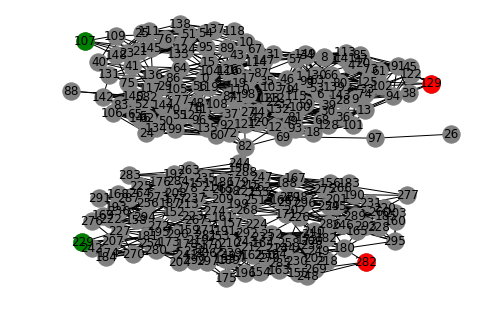

In [12]:
nw=1
mod=5
pos=nx.kamada_kawai_layout(nx.from_numpy_array(Modular[nw][mod]['adj_matrix']))
nx.draw(nx.from_numpy_array(Modular[nw][mod]['adj_matrix']),pos=pos,node_color='grey',with_labels=True)
nx.draw_networkx_nodes(nx.from_numpy_array(Modular[nw][mod]['adj_matrix']),pos=pos,nodelist=[electrodes[nw][0],electrodes[nw][2]],node_color='g')
nx.draw_networkx_nodes(nx.from_numpy_array(Modular[nw][mod]['adj_matrix']),pos=pos,nodelist=[electrodes[nw][1],electrodes[nw][3]],node_color='r')

In [ ]:
# fig,axes=plt.subplots(2,3,figsize=(10,8))
network=7
i = 0
for ax in axes.flat:
    pos=nx.kamada_kawai_layout(Modular[nw][i]['G'])
    nx.draw(Modular[nw][i]['G'],pos=pos,ax=ax,node_size=20,node_color='grey',with_labels=False)
    nx.draw_networkx_nodes(nx.from_numpy_array(Modular[nw][i]['adj_matrix']),pos=pos,nodelist=[electrodes[nw][0],electrodes[nw][2]],node_color='g',node_size=40,ax=ax)
    nx.draw_networkx_nodes(nx.from_numpy_array(Modular[nw][i]['adj_matrix']),pos=pos,nodelist=[electrodes[nw][1],electrodes[nw][3]],node_color='r',node_size=40,ax=ax)
    i=i+1
    
plt.savefig(saveFig+'VSweep 300NWN Varying Modularity_2Modules Networks.pdf',format='pdf',dpi=300)

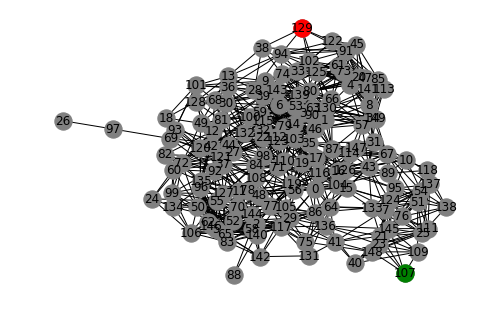

In [254]:
nw=1
mod=0
pos=nx.kamada_kawai_layout(nx.from_numpy_array(Modular_separate[nw][mod][0]['adj_matrix']))
nx.draw(nx.from_numpy_array(Modular_separate[nw][mod][0]['adj_matrix']),pos=pos,node_color='grey',with_labels=True)
nx.draw_networkx_nodes(nx.from_numpy_array(Modular_separate[nw][mod][0]['adj_matrix']),pos=pos,nodelist=[electrodes_separate[nw][0]],node_color='g')
nx.draw_networkx_nodes(nx.from_numpy_array(Modular_separate[nw][mod][0]['adj_matrix']),pos=pos,nodelist=[electrodes_separate[nw][1]],node_color='r')

In [10]:
#Find nodes in each module:
module1=[]
module2=[]
for nw in range(len(Modular)):
    for mod in range(len(Modular[nw])):
        ci,q=bct.community_louvain(Modular[nw][5]['adj_matrix'],gamma=0.1)
        module1.append(np.array([i for i in Modular[nw][5]['G'].nodes])[ci==1])
        module2.append(np.array([i for i in Modular[nw][5]['G'].nodes])[ci==2])
module1=np.array(module1).reshape(10,6)
module2=np.array(module2).reshape(10,6)

### RUN TASKS

In [167]:
def voltSweep(onAmp,i,j,k,elecs):
    ampName=str(onAmp).replace('.','p')

    Connectivity=decompress_pickle(dataLoc+'NWN_Network_9modules_10sets_'+str(j+1)+'_'+str(k+1)+'.pkl')

    Graph= nx.from_numpy_matrix(Connectivity.adj_matrix)

    stimulus=[]
    dt = 1e-3
    f=0.5
    Time=5

    #Choose Electrode Pattern

    stimulus.append((stimulus__(biasType='AC',onAmp=onAmp,TimeVector=np.arange(0,Time,dt),f=f)))
    stimulus.append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training
#     stimulus.append((stimulus__(biasType='AC',onAmp=onAmp,TimeVector=np.arange(0,Time,dt),f=f)))
#     stimulus.append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training
    
    results_minMax=runSim(connectivity__(graph=Graph),stimulus=stimulus, contactMode='preSet',electrodes=elecs[:2],T = Time, dt = dt, onAmp = onAmp, biasType='AC',f=f,junctionMode='tunneling',findFirst=False)
#     set_trace()
#     print('saving')
#     activation = findCurrent(results_minMax, 1)
    results={'JunctionConductance':results_minMax.junctionConductance[-1],'JunctionVoltage':results_minMax.junctionVoltage[-1],'Switch':results_minMax.junctionSwitch[-1],'Source':results_minMax.sources[0:2],'Drain':results_minMax.drains[0:2],'Signal':results_minMax.stimulus,'conductance':results_minMax.conductance}
    compressed_pickle(results,dataLoc+'_NLT_Simulation_'+'_9modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
#             compressed_pickle(results,r'/project/NASN/Alon/'+nwType+'/'+nwType+' Results/'+nwType+'_NLT_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v.pkl')
    results_minMax.frequency=f
    results_minMax.dt=dt
    period=1/f

    if len(Graph) >= 250:
#         nodesList=[50,100,150,200,250,len(ASN300[Max_Min_NWS[j][0]][Max_Min_NWS[j][1]]['G'])]#range(50, len(ws300[i][0])+1,50)
        nodesList=[len(Graph)]#only want all nodes
    elif len(Graph) >= 200 and len(Graph) < 250:
        nodesList=[len(Graph)]
    elif len(Graph) >= 150 and len(Graph) < 200:
        nodesList=[len(Graph)] 
    elif len(Graph) >= 100 and len(Graph) < 150:
        nodesList=[len(Graph)]

    nwSqu =[None]*len(nodesList)

    countK=0
    for k in nodesList: #loop through sets of nodes for regression
        print('Running Regression: ' + str(k) + ' nodes')
        ResultSqu=[]
        ResultSqu = nonLinearTrans(results_minMax,'Square',k, repeats=50) #simulation, type of signal, number of nodes to sample from, number of linear regression repetitions (take avg)
        nwSqu[countK]=ResultSqu['accuracy']
        countK=countK+1
        
    return nwSqu


In [168]:
def get_MC_Voltsweep(i,j,k,elecs,amp = 2, dt = 0.01, dur = 1, n_outs = 100, init_state = None, return_sim = False):
    ampName=str(amp).replace('.','p')
    Connectivity=decompress_pickle(dataLoc+'NWN_Network_9modules_10sets_'+str(j+1)+'_'+str(k+1)+'.pkl')
    Graph= nx.from_numpy_matrix(Connectivity.adj_matrix)
#     temp=decompress_pickle(dataLoc+'NWN_Network_9modules_separated_10sets_'+str(j+1)+'.pkl')
#     Connectivity1=temp[1]
#     Graph= nx.from_numpy_matrix(Connectivity1.adj_matrix)
    stimulus=[]
    stimulus.append(stimulus__(biasType='Custom',TimeVector=np.arange(0,10,dt),customSignal=signal_expand(np.random.random(1000)*2*amp-amp, dur)))
    stimulus.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
#     stimulus.append(stimulus__(biasType='Custom',TimeVector=np.arange(0,10,dt),customSignal=signal_expand(np.random.random(1000)*2*amp-amp, dur)))
#     stimulus.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
#     elecs=elecs[-2:]
    simRAND = runSim(connectivity__(graph=Graph), T = 10, dt = dt,
                stimulus=stimulus,
                biasType = 'Custom', customSignal = signal_expand(np.random.random(1000)*2*amp-amp, dur), 
                junctionMode = 'tunneling', 
#                 contactMode = 'farthest',
                electrodes=elecs[:2],
                findFirst=False, disable_tqdm=True)    
    
#     print('Saving Simulations for Parameter ' +str(i+1))
#     activation = findCurrent(simRAND, 1)
    results={'JunctionConductance':simRAND.junctionConductance[-1],'JunctionVoltage':simRAND.junctionVoltage[-1],'Switch':simRAND.junctionSwitch[-1],'Source':simRAND.sources[0:2],'Drain':simRAND.drains[0:2],'Signal':simRAND.stimulus,'conductance':simRAND.conductance}
    compressed_pickle(results,dataLoc+'_MC_Simulation_'+'_9modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
        #     compressed_pickle(results,r'/project/NASN/Alon/'+nwType+'/'+nwType+' Results/'+nwType+'_NLT_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v.pkl')
    mcRAND = [MC_k(simRAND, k, n_outs = len(Graph)) for k in range(dur, len(Graph)*dur, dur)]
    
    if return_sim:
        return np.sum(mcRAND), simRAND, Graph, dur
    else:
        return np.sum(mcRAND)

In [169]:
def nonLinearTrans_specificNodes(network, targetType, nodesList, repeats = 1):
    """
    targetType can be DoubleFrequency and all other possible biasType.
    wireVoltage[T,N] can also be the first positional parameter.
    """
    from edamame.core.simSettings import stimulus__

    if targetType == 'DoubleFrequency':
        target = stimulus__(network.stimulus[0].biasType, network.TimeVector, f = 2*network.stimulus[0].f).signal
    else:
        target = stimulus__(targetType, network.TimeVector, f = network.stimulus[0].f).signal
        
    wireVoltage = network.wireVoltage    
    T, N = wireVoltage.shape
    output = dict()
    accuracy = np.zeros(repeats)
    weight = np.zeros((repeats, len(nodesList)+1))
    result = np.zeros((repeats, T))
    
    for i in range(repeats):
        lhs = np.hstack((np.ones((T, 1)), wireVoltage[:,nodesList]))
        weight[i,:] = np.linalg.lstsq(lhs, target, rcond = None)[0]
        result[i,:] = np.dot(lhs, weight[i,:])
        accuracy[i] = 1-getRNMSE(result[i,:], target)
        
    output['weight'] = np.mean(weight, axis = 0)
    output['result'] = np.mean(result, axis = 0)
    output['accuracy'] = np.mean(accuracy)
    output['target'] = target
    
    return output 

In [170]:
def MC_k_new(network, k = 1, node_list=[], transient = 100):
#     node_list=n_outs#len(node_list)
    signal = network.stimulus[0].signal[transient:]
    wire_voltage = network.wireVoltage[transient:]
    T, N = wire_voltage.shape
#     node_list = np.random.choice(range(0, N), n_outs, replace = False)
    
    lhs = wire_voltage[k:,node_list]
    rhs = signal[:-k]
    try:
        weight = np.linalg.lstsq(lhs, rhs, rcond = None)[0]
        result = np.matmul(lhs, weight)
        mc = (np.cov(rhs, result)[0,1])**2/(np.var(signal[k:])*np.var(result))
        return mc
    except:
        return 0

In [18]:
def get_MC_and_NLT(j,k,elecs,module1,module2,amp = 2, dt = 0.01, dur = 1, n_outs = 100, init_state = None, return_sim = False):
    ampName=str(amp).replace('.','p')
    f=0.5
    Connectivity=decompress_pickle(dataLoc+'NWN_Network_2modules_10sets_'+str(j+1)+'_'+str(k+1)+'.pkl')

    Graph= nx.from_numpy_matrix(Connectivity.adj_matrix)

    stimulus=[]
    stimulus.append(stimulus__(biasType='AC',onAmp=amp,TimeVector=np.arange(0,10,dt),f=f))
    stimulus.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
    stimulus.append(stimulus__(biasType='Custom',TimeVector=np.arange(0,10,dt),customSignal=signal_expand(np.random.random(1000)*2*amp-amp, dur)))
    stimulus.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
    simRAND = runSim(connectivity__(graph=Graph), T = 10, dt = dt,
                start_state =  init_state,
                stimulus=stimulus,
                onAmp=amp,
                junctionMode = 'tunneling', 
                contactMode = 'preSet',
                electrodes=elecs,
                findFirst=False, disable_tqdm=True)

#     print('Saving Simulations for Parameter ' +str(i+1))
#     activation = findCurrent(simRAND, 1)
    results={'JunctionConductance':simRAND.junctionConductance[-1],'JunctionVoltage':simRAND.junctionVoltage[-1],'Switch':simRAND.junctionSwitch[-1],'Source':simRAND.sources[0:2],'Drain':simRAND.drains[0:2],'Signal':simRAND.stimulus}
    compressed_pickle(results,dataLoc+'NLT+MC_ElectrodesParallel_'+'2modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
        #     compressed_pickle(results,r'/project/NASN/Alon/'+nwType+'/'+nwType+' Results/'+nwType+'_NLT_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v.pkl')
   
    nodesList=[]
    if electrodes[j][2] in module1[j][0]:   #if the MC electrode is in module one, we only want to sample from those nodes
        nodesList=module1[j][0] #only want nodes in first module
    else:
        nodesList=module2[j][0]
    
    mcRAND = [MC_k_new(simRAND, l, node_list=nodesList) for l in range(dur, len(nodesList)*dur, dur)]
    
    nodesList=[]
    if electrodes[j][0] in module1[j][0]:   #if the NLT electrode is in module one, we only want to sample from those nodes
        nodesList=module1[j][0] #only want nodes in first module
    else:
        nodesList=module2[j][0]
        
    nwSqu =[None]*len(nodesList)

    countK=0
    #Need to write a way to read out only from the nodes in nodesList
    ResultSqu = nonLinearTrans_specificNodes(simRAND,'Square',nodesList, repeats=50) #simulation, type of signal, number of nodes to sample from, number of linear regression repetitions (take avg)
    nwSqu=ResultSqu['accuracy']
    
    if return_sim:
        return np.sum(mcRAND), simRAND, nwSqu
    else:
        return np.sum(mcRAND),nwSqu

In [24]:
def get_MC_and_NLT_separate(j,elecs,amp = 2, dt = 0.01, dur = 1, n_outs = 100, init_state = None, return_sim = False):
    ampName=str(amp).replace('.','p')
    f=0.5
    temp=decompress_pickle(dataLoc+'NWN_Network_2modules_separated_10sets_'+str(j+1)+'.pkl')
    Connectivity1=temp[0]
    Connectivity2=temp[1]
    Graph1= nx.from_numpy_matrix(Connectivity1.adj_matrix)
    Graph2= nx.from_numpy_matrix(Connectivity2.adj_matrix)
    
    stimulus1=[]
    stimulus2=[]
    stimulus1.append(stimulus__(biasType='AC',onAmp=amp,TimeVector=np.arange(0,10,dt),f=f))
    stimulus1.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
    stimulus2.append(stimulus__(biasType='Custom',TimeVector=np.arange(0,10,dt),customSignal=signal_expand(np.random.random(1000)*2*amp-amp, dur)))
    stimulus2.append(stimulus__(biasType='Drain',TimeVector=np.arange(0,10,dt))) #we don't want this drain to be active during training
    elecsNLT=elecs[:2]
    elecsMC=elecs[-2:]

    #NLT
    simNLT= runSim(connectivity__(graph=Graph1), T = 10, dt = dt,
                onAmp=amp, f=f,
                stimulus=stimulus1, 
                junctionMode = 'tunneling', 
                contactMode = 'preSet',
                biasType='AC',   
                electrodes=elecsNLT,
                findFirst=False, disable_tqdm=True)
    
    simMC = runSim(connectivity__(graph=Graph2), T = 10, dt = dt,
                stimulus=stimulus2,
                biasType = 'Custom', customSignal = signal_expand(np.random.random(1000)*2*amp-amp, dur), 
                junctionMode = 'tunneling', 
                contactMode = 'preSet',
                electrodes=elecsMC,
                findFirst=False, disable_tqdm=True)    

#     activation = findCurrent(simRAND, 1)
    results={'JunctionConductance':simNLT.junctionConductance[-1],'JunctionVoltage':simNLT.junctionVoltage[-1],'Switch':simNLT.junctionSwitch[-1],'Source':simNLT.sources[0:2],'Drain':simNLT.drains[0:2],'Signal':simNLT.stimulus}
    resultsMC={'JunctionConductance':simMC.junctionConductance[-1],'JunctionVoltage':simMC.junctionVoltage[-1],'Switch':simMC.junctionSwitch[-1],'Source':simMC.sources[0:2],'Drain':simMC.drains[0:2],'Signal':simMC.stimulus}
    compressed_pickle(results,dataLoc+'NLT_ElectrodesSeparated_'+'2modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
    compressed_pickle(resultsMC,dataLoc+'MC_ElectrodesSeparated_'+'2modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
   
    nodesList=[i for i in Graph2.nodes]
    
    mcRAND = [MC_k_new(simMC, l, node_list=nodesList) for l in range(dur, len(nodesList)*dur, dur)]
    
    nodesList=[]
    nodesList=[i for i in Graph1.nodes] #only want nodes in first module

    nwSqu =[None]*len(nodesList)

    countK=0
    #Need to write a way to read out only from the nodes in nodesList
    ResultSqu = nonLinearTrans_specificNodes(simNLT,'Square',nodesList, repeats=50) #simulation, type of signal, number of nodes to sample from, number of linear regression repetitions (take avg)
    nwSqu=ResultSqu['accuracy']
    
    if return_sim:
        return np.sum(mcRAND), simRAND, nwSqu
    else:
        return np.sum(mcRAND),nwSqu

In [171]:
initMC=[]
for i in tqdm(range(len(onAmp))): #for each voltage
    for j in range(10): #for each network
        for k in range(6):#for each modularity:
            initMC.append(inputPacker(get_MC_Voltsweep,i,j,k,electrodes[j],amp=onAmp[i]))

In [172]:
init=[]
for i in tqdm(range(len(onAmp))): #for each voltage
    for j in range(10): #for each network
        for k in range(6):#for each modularity:
            init.append(inputPacker(voltSweep,onAmp[i],i,j,k,electrodes[j]))

In [173]:
result=para_run(voltSweep,init,nCPU=10,start_method='fork')


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 295 nodes

Running Regression: 297 nodes

Running Regression: 295 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 295 nodes
Running Regression: 295 nodes

Running Regression: 297 nodes




Running Regression: 295 nodes
Running Regression: 295 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes


Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodesRunning Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes

Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 297 nodesRunning Regression: 297 nodes





Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes




Running Regression: 295 nodes
Running Regression: 295 nodes


Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes




Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 293 nodes


Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes




Running Regression: 297 nodes

Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 295 nodes


Running Regression: 295 nodes
Running Regression: 295 nodes



Running Regression: 295 nodes


Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 294 nodes
Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 295 nodes
Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 294 nodes


Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 294 nodes

Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 295 nodes
Running Regression: 295 nodes

Running Regression: 295 nodes


Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes




Running Regression: 293 nodes
Running Regression: 293 nodes





Running Regression: 295 nodes
Running Regression: 295 nodes
Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 295 nodes
Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 294 nodes
Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 294 nodes
Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes

Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 295 nodes


Running Regression: 295 nodes


Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 294 nodes
Running Regression: 294 nodes

Running Regression: 294 nodes


Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes


Running Regression: 297 nodes
Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes


Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 293 nodes


Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes


Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes




Running Regression: 295 nodes
Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 295 nodes



Running Regression: 295 nodes

Running Regression: 295 nodes

Running Regression: 297 nodes




Running Regression: 297 nodes
Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 297 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes




Running Regression: 293 nodes
Running Regression: 293 nodes



Running Regression: 293 nodes



Running Regression: 293 nodes

Running Regression: 293 nodes

Running Regression: 293 nodes



Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



Running Regression: 294 nodes




Running Regression: 294 nodes
Running Regression: 294 nodes



Running Regression: 294 nodes



Running Regression: 294 nodes

Running Regression: 294 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes

Running Regression: 297 nodes



In [174]:
resultMC=[]
for i in tqdm(range(10)):
    resultMC.append(para_run(get_MC_Voltsweep,initMC,nCPU=10,start_method='fork'))

In [175]:
resultMC=np.mean(resultMC,axis=0)

In [173]:
resultMC

array([  0.30524875,   0.30524875,   0.30524875,   0.30524875,
         0.30524875,   0.30524875,   0.30524875,   0.30524875,
         0.30524875,   0.30524875,   0.44331746,   0.81551336,
         1.67487913,   0.84234501,   0.83639039,   0.83435165,
         0.83219922,   0.43915187,   0.8311981 ,   0.82139628,
         0.36283006,   0.37335987,   0.4049493 ,   0.4154791 ,
         0.83748764,   0.786021  ,   0.68487853,   0.75792503,
         0.66415631,   0.37534735,   0.68029648,   0.83751149,
         0.76040511,   0.74309625,   0.47130202,   0.71311157,
         0.83185986,   0.84285993,   0.6642685 ,   0.41326246,
         0.37197636,   0.37310899,   0.37713933,   0.36925099,
         0.52492182,   0.40655952,   0.38932379,   0.41411056,
         0.37317338,   0.37683125,   0.51069622,   0.62957721,
         0.59282592,   0.4778121 ,   0.57770268,   0.55777382,
         0.65771826,   0.71565034,   0.53235577,   0.58071899,
         1.51816196,   1.3656885 ,   2.20752088,   1.34

In [26]:
initMCNLT=[]
for i in tqdm(range(len(onAmp))): #for each voltage
    for j in range(10): #for each network
        for k in range(6):#for each modularity:
            initMCNLT.append(inputPacker(get_MC_and_NLT,j,k,elecs=electrodes[j],module1=module1,module2=module2,amp=onAmp[i]))

In [27]:
# [mcacc,mcsim,Graph,dur]=get_MC_Voltsweep(5,0,5,elecs=electrodes[0],amp=onAmp[5],return_sim=True)

In [28]:
get_MC_and_NLT_separate(0,elecs=electrodes_separate[0],amp=onAmp[-1])

(24.37266006512028, 0.7406818442263149)

In [29]:
initMCNLT_separate=[]
for i in tqdm(range(len(onAmp))): #for each voltage
    for j in range(10): #for each network
        initMCNLT_separate.append(inputPacker(get_MC_and_NLT_separate,j,elecs=electrodes_separate[j],amp=onAmp[i]))

In [30]:
resultMCNLT=[None]*10
for i in tqdm(range(10)):
    resultMCNLT[i]=para_run(get_MC_and_NLT,initMCNLT,nCPU=10,start_method='fork')

In [31]:
resultMCNLT_separate=[None]*10
for i in tqdm(range(10)):
    resultMCNLT_separate[i]=para_run(get_MC_and_NLT_separate,initMCNLT_separate,nCPU=10,start_method='fork')

### TASK ANALYSIS

In [46]:
MC=[]
NLT=[]
for i in range(len(resultMCNLT)):
    MC.append(np.array(resultMCNLT[i]).T[0])
    NLT.append(np.hstack(np.array(resultMCNLT[i]).T[1]))

NameError: name 'resultMCNLT' is not defined

In [33]:
MCsep=[]
NLTsep=[]
for i in range(len(resultMCNLT_separate)):
    MCsep.append(np.array(resultMCNLT_separate[i]).T[0])
    NLTsep.append(np.hstack(np.array(resultMCNLT_separate[i]).T[1]))

In [34]:
MC=np.mean(MC,axis=0)
NLT=np.mean(NLT,axis=0)
MCsep=np.mean(MCsep,axis=0)
NLTsep=np.mean(NLTsep,axis=0)

In [35]:
MC=np.array(np.double(MC)).reshape(11,60)
NLT=np.array(np.double(NLT)).reshape(11,60)

In [36]:
MCsep=np.array(np.double(MCsep)).reshape(11,10)
NLTsep=np.array(np.double(NLTsep)).reshape(11,10)

In [37]:
compressed_pickle([NLT,NLTsep],dataLoc+'VoltageSweep_Networks_NWN_2modules_NLT')
compressed_pickle([MC,MCsep],dataLoc+'VoltageSweep_Networks_NWN_2modules_MC')

In [21]:
[NLT,NLTsep]=decompress_pickle(dataLoc+'VoltageSweep_Networks_NWN_2modules_NLT')
[MC,MCsep]=decompress_pickle(dataLoc+'VoltageSweep_Networks_NWN_2modules_MC')

In [22]:
tempResults=NLT.reshape(11,10,6)
tempResultsMC=MC.reshape((11,10,6))
newResults=[];newResultsMC=[]
for i in range(len(tempResults)):
    newResults.append(tempResults[i].T)
    newResultsMC.append(tempResultsMC[i].T)

tempResults=NLTsep
tempResultsMC=MCsep
newResults_sep=[];newResultsMC_sep=[]
for i in range(len(tempResults)):
    newResults_sep.append(tempResults[i].T)
    newResultsMC_sep.append(tempResultsMC[i].T)

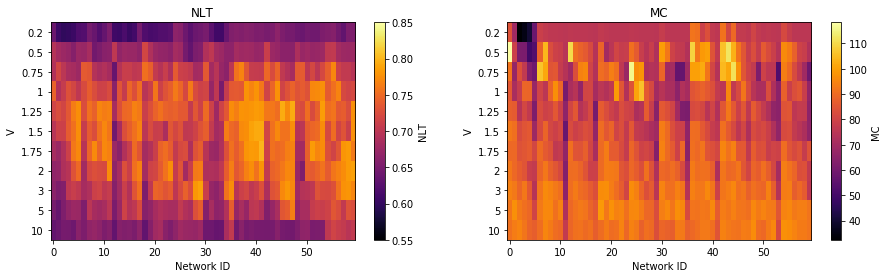

In [23]:
fig,axes=plt.subplots(1,2,figsize=(15,4))
fig.subplots_adjust(wspace=0.2)
ax=axes[0]
ax.set_title('NLT')
a=ax.imshow(NLT,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLT')

ax=axes[1]
ax.set_title('MC')
b=ax.imshow(MC,aspect='auto',cmap=plt.cm.inferno)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MC')

# plt.savefig(saveFig+'NLT + MC Separate Simulation Performance - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300)

In [24]:
nltMean=[]
for i in range(len(onAmp)):
    nltMean.append(np.mean(newResults[i],axis=1))

In [25]:
meanNLT=np.mean(newResults,axis=2)
meanMC=np.mean(newResultsMC,axis=2)
meanNLT_sep=np.mean(newResults_sep,axis=1)
meanMC_sep=np.mean(newResultsMC_sep,axis=1)

stdNLT=np.std(newResults,axis=2)
stdMC=np.std(newResultsMC,axis=2)
stdNLT_sep=np.std(newResults_sep,axis=1)
stdMC_sep=np.std(newResultsMC_sep,axis=1)

In [26]:
dfmeanMC=pd.DataFrame(meanMC)
dfmeanNLT=pd.DataFrame(meanNLT)
dfmeanMC_sep=pd.DataFrame(meanMC_sep)
dfmeanNLT_sep=pd.DataFrame(meanNLT_sep)

dfstdNLT=pd.DataFrame(stdNLT)
dfstdMC=pd.DataFrame(stdMC)
dfstdMC_sep=pd.DataFrame(stdMC_sep)
dfstdNLT_sep=pd.DataFrame(stdNLT_sep)

In [27]:
onAmp

[0.2, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 10]

In [29]:
# plt.figure(figsize=(10,8))
# plt.plot(np.array(dfmeanNLT[0]),np.array(dfmeanMC[0]),color=range(len(onAmp)))
# # plt.legend(nwNames4)

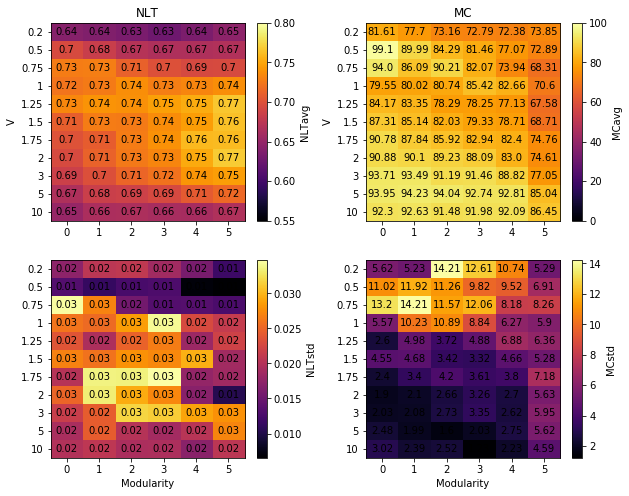

In [30]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.subplots_adjust(wspace=0.3)
ax=axes[0][0]
ax.set_title('NLT')
a=ax.imshow(dfmeanNLT,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.8)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLTavg')
for (j,i),label in np.ndenumerate(dfmeanNLT):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')

ax=axes[0][1]
ax.set_title('MC')
b=ax.imshow(dfmeanMC,aspect='auto',cmap=plt.cm.inferno,vmin=0,vmax=100)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCavg')
for (j,i),label in np.ndenumerate(dfmeanMC):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
ax=axes[1][0]
b=ax.imshow(dfstdNLT,aspect='auto',cmap=plt.cm.inferno)
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLTstd')
for (j,i),label in np.ndenumerate(dfstdNLT):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
ax=axes[1][1]
b=ax.imshow(dfstdMC,aspect='auto',cmap=plt.cm.inferno)
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCstd')
for (j,i),label in np.ndenumerate(dfstdMC):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')

# plt.savefig(saveFig+'Avg NLT+MC Same Sim allNodes - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300)

In [ ]:
dfmeanMC.values

In [32]:
maxMCval=np.max(np.hstack((dfmeanMC.values,dfmeanMC_sep.values)))
maxNLTval=np.max(np.hstack((dfmeanNLT.values,dfmeanNLT_sep.values)))
minMCval=np.min(np.hstack((dfmeanMC.values,dfmeanMC_sep.values)))
minNLTval=np.min(np.hstack((dfmeanNLT.values,dfmeanNLT_sep.values)))

In [ ]:
maxMCval

In [33]:
#Calculate the difference between each network and the max possible performance

dfMC_diffMax=[]
for i in range(7):
    if i < 6:
        dfMC_diffMax.append((maxMCval-dfmeanMC[i])/(maxMCval-minMCval))
    else:
        dfMC_diffMax.append((maxMCval-dfmeanMC_sep[0])/(maxMCval-minMCval))
    
dfNLT_diffMax=[]
for i in range(7):
    if i < 6:
        dfNLT_diffMax.append((maxNLTval-dfmeanNLT[i])/(maxNLTval-minNLTval))
    else:
        dfNLT_diffMax.append((maxNLTval-dfmeanNLT_sep[0])/(maxNLTval-minNLTval))


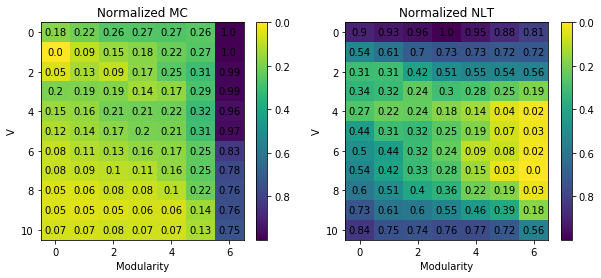

In [40]:

fig,axes=plt.subplots(1,2,figsize=(10,4))
ax=axes[0]
a1=ax.imshow(np.array(dfMC_diffMax).T,aspect='auto',cmap=plt.cm.viridis_r)
cb=plt.colorbar(a1,ax=ax)
cb.ax.invert_yaxis() 
ax.set_title('Normalized MC')
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
cb.set_ticks(np.around(np.arange(0,1,step=0.2),1))
cb.set_ticklabels(np.around(np.arange(0,1.1,0.2),1))


for (j,i),label in np.ndenumerate(np.array(dfMC_diffMax).T):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')


ax=axes[1]
b1=ax.imshow(np.array(dfNLT_diffMax).T,aspect='auto',cmap=plt.cm.viridis_r)
cb=plt.colorbar(b1,ax=ax)
cb.ax.invert_yaxis() 

ax.set_title('Normalized NLT')
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
cb.set_ticks(np.around(np.arange(0,1,step=0.2),1))
cb.set_ticklabels(np.around(np.arange(0,1.1,0.2),1))


for (j,i),label in np.ndenumerate(np.array(dfNLT_diffMax).T):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(saveFig+'Normalized NLT and MC Max Diff allNodes - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300)


In [41]:
normalizedDifferenceNLT_MC=(np.array(dfNLT_diffMax).T+np.array(dfMC_diffMax).T)/2#/(a.T+b.T)
# normalizedDifferenceMC_NLT=(b.T-a.T)#/(b.T+a.T)

In [95]:
# from matplotlib import pylab as pl
# %matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(4,4))
# ax1 = fig.add_subplot(111, projection='3d')
# pd.DataFrame(normalizedDifferenceNLT_MC.T)
# x,y = np.mgrid[:normalizedDifferenceNLT_MC.shape[0],:normalizedDifferenceNLT_MC.shape[1]]
# ax1.plot_surface(y,x,normalizedDifferenceNLT_MC,cmap=pl.cm.viridis_r,rstride=1,cstride=1,linewidth=0.,antialiased=False)


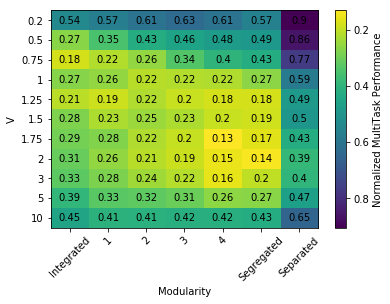

In [44]:
import matplotlib.colors
fig,ax=plt.subplots(1)
plt.imshow(np.abs(normalizedDifferenceNLT_MC),aspect='auto',cmap=plt.cm.viridis_r)
cb=plt.colorbar(label='Normalized MultiTask Performance',ax=ax)
cb.ax.invert_yaxis() 
cb.set_ticks(np.arange(0,1,step=0.2))
cb.set_ticklabels(np.around(np.arange(0,1.1,0.2),2))


ax=plt.gca()
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Integrated','1','2','3','4','Segregated','Separated'],rotation=45)
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
for (j,i),label in np.ndenumerate(np.abs(normalizedDifferenceNLT_MC)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(saveFig+'Normalized NLT + MC Max Diff allNodes - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300,optimize=True)

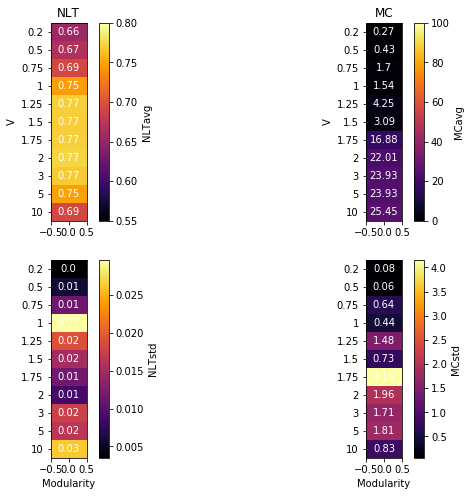

In [49]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.subplots_adjust(wspace=0.3)
ax=axes[0][0]
ax.set_title('NLT')
a=ax.imshow(dfmeanNLT_sep,aspect='0.5',cmap=plt.cm.inferno,vmin=0.55,vmax=0.8)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLTavg')
for (j,i),label in np.ndenumerate(dfmeanNLT_sep):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='white')

ax=axes[0][1]
ax.set_title('MC')
b=ax.imshow(dfmeanMC_sep,aspect='0.5',cmap=plt.cm.inferno,vmin=0,vmax=100)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCavg')
for (j,i),label in np.ndenumerate(dfmeanMC_sep):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='white')
    
ax=axes[1][0]
b=ax.imshow(dfstdNLT_sep,aspect='0.5',cmap=plt.cm.inferno)
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLTstd')
for (j,i),label in np.ndenumerate(dfstdNLT_sep):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='white')
    
ax=axes[1][1]
b=ax.imshow(dfstdMC_sep,aspect='0.5',cmap=plt.cm.inferno)
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCstd')
for (j,i),label in np.ndenumerate(dfstdMC_sep):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='white')

plt.savefig(saveFig+'Avg NLT+MC Separate Sim allNodes - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300)

(11,)

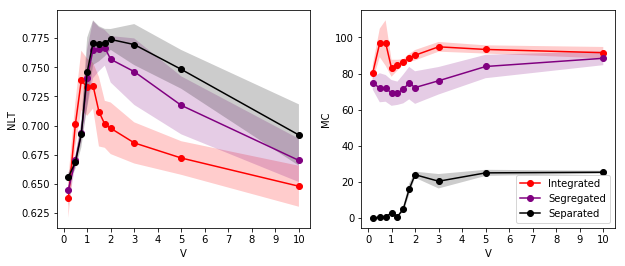

In [99]:
colors=['red','orange','yellow','green','blue','purple']
names=['Integrated','2','3','4','5','Segregated']
x=onAmp


y=dfmeanNLT
err=dfstdNLT
y_mc=dfmeanMC
err_mc=dfstdMC
y2=dfmeanNLT_sep
y_mc2=dfmeanMC_sep
err2=dfstdNLT_sep
err_mc2=dfstdMC_sep


fig,axes=plt.subplots(1,2,figsize=(10,4))
ax=axes[0]

for i in range(len(y)):
    if i == 0 or i == 5:
        b=ax.plot(x,y[i],'-o',c=colors[i])
        ax.fill_between(x,y[i]-err[i],y[i]+err[i],alpha=0.2,facecolor=colors[i])
ax.set_xticks(np.arange(0,len(onAmp)))
ax.set_xlabel('V')
ax.set_ylabel('NLT')

a=ax.plot(x,y2,'-o',c='k')#,c=colors)
ax.fill_between(np.array(x),np.array(y2-err2).reshape(11),np.array(y2+err2).reshape(11),alpha=0.2,facecolor='k')#,facecolor=colors)
ax.set_xticks(np.arange(0,len(onAmp)))
ax.set_xlabel('V')
ax.set_ylabel('NLT')
plt.legend(['Separated',names[0],names[5]])

ax=axes[1]

for i in range(len(y_mc)):
    if i == 0 or i == 5:
        b=ax.plot(x,y_mc[i],'-o',c=colors[i])
        ax.fill_between(x,y_mc[i]-err_mc[i],y_mc[i]+err_mc[i],alpha=0.2,facecolor=colors[i])
        
a=ax.plot(x,y_mc2,'-o',c='k')#,c=colors)
ax.fill_between(np.array(x),np.array(y_mc2-err_mc2).reshape(11),np.array(y_mc2+err_mc2).reshape(11),alpha=0.2,facecolor='k')#,facecolor=colors)
ax.set_xticks(np.arange(0,len(onAmp)))
ax.set_xlabel('V')
ax.set_ylabel('MC')


ax.set_xticks(np.arange(0,len(onAmp)))
ax.set_xlabel('V')
ax.set_ylabel('MC')
plt.legend([names[0],names[5],'Separated'])

plt.savefig(saveFig+'NLT + MC Separate vs Same Simulation Performance - VSweep 300NWN Varying Modularity_2Modules.pdf',format='pdf',dpi=300)

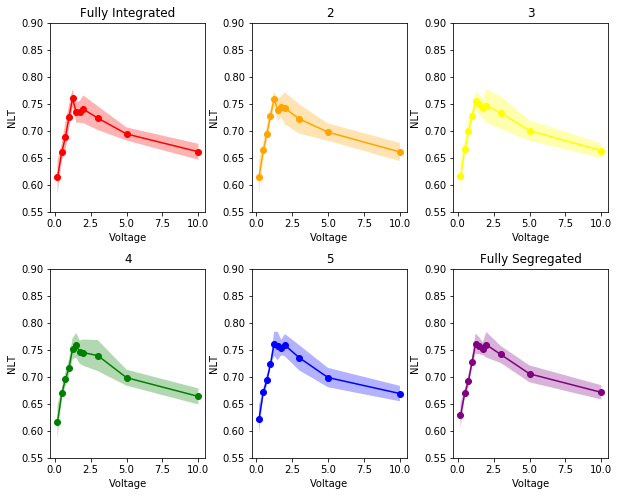

In [786]:
fig,axes=plt.subplots(2,3,figsize=(10,8))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)

a=[]
i=0
for ax in axes.flat:
    a.append(ax.plot(x,y[i],'-o',c=colors[i]))
    ax.fill_between(x,y[i]-err[i],y[i]+err[i],alpha=0.3,facecolor=colors[i])
    ax.set_ylim([0.55,0.9])
    ax.set_title(names[i])
    i=i+1
    ax.set_ylabel('NLT')
    ax.set_xlabel('Voltage')

### Functional Analysis

In [176]:
[NLT,NLTsep]=decompress_pickle(dataLoc+'VoltageSweep_Networks_NWN_2modules_NLT')
[MC,MCsep]=decompress_pickle(dataLoc+'VoltageSweep_Networks_NWN_2modules_MC')

In [57]:
NWN_sims=[[[None]*10 for i in range(6)] for i in range(11)]
NWN_networks=[[None]*10 for i in range(6)]
for i in range(len(onAmp)):
    ampName=str(onAmp[i]).replace('.','p')
    for j in range(10): #for each network
        for k in range(6):#for each modularity:
            NWN_sims[i][k][j]=decompress_pickle(dataLoc+'NLT+MC_ElectrodesParallel_'+'2modules_10sets_Network_'+str(j+1)+'_'+str(k+1)+'_'+ampName+'v.pkl')
            if i == 0:
                Connectivity=decompress_pickle(dataLoc+'NWN_Network_2modules_10sets_'+str(j+1)+'_'+str(k+1)+'.pkl')
                NWN_networks[k][j]=Connectivity.adj_matrix

In [89]:
networks=np.array(NWN_networks).reshape(60)
simulations=np.array(NWN_sims).reshape(11,60)

In [95]:
#Subgraph AdjMat

#Threshold by conductance - when tunnelling becomes appreciable (offResistance * 10)

def getOnGraph(sims,network,edgeList,numWires):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    adjMat[edgeList[:,0], edgeList[:,1]] = (1/sims['JunctionResistance'])>1e-06#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    adjMat[edgeList[:,1], edgeList[:,0]] = (1/sims['JunctionResistance'])>1e-06#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    onGraph = nx.from_numpy_array(adjMat)
    onGraph=nx.DiGraph.to_undirected(onGraph)
    
    return onGraph

def getWeightedGraph(sims,network,edgeList,numWires):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    adjMat[edgeList[:,0], edgeList[:,1]] = sims['JunctionConductance']#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    adjMat[edgeList[:,1], edgeList[:,0]] = sims['JunctionConductance']#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    WeightedGraph = nx.from_numpy_array(adjMat)
    WeightedGraph=nx.DiGraph.to_undirected(WeightedGraph)
    
    return WeightedGraph

In [235]:
subgraph_idx=[[] for i in range(len(NWN_sims))]
subgraph=[[] for i in range(len(NWN_sims))]
current=[[] for i in range(len(NWN_sims))]
sources=[[] for i in range(len(NWN_sims))]
drains=[[] for i in range(len(NWN_sims))]
weightedSubGraph=[[] for i in range(len(NWN_sims))]
for k in range(len(NWN_sims)):
    for i in tqdm(range(len(simulations[0]))):
        sim=simulations[k][i]
        network=networks[i]
        graph=nx.from_numpy_array(network)
    #     color=colorstop[i] #colors

        sources[k].append(sim['Source'])
        drains[k].append(sim['Drain'])
        OGgraph=graph
        pos=nx.kamada_kawai_layout(OGgraph)

        sim['JunctionResistance']=1/sim['JunctionConductance']
        edgeList=np.array(list(graph.edges()))
        numWires=graph.number_of_nodes()
        subGraph=getOnGraph(sim,network,edgeList,numWires)
        weightedSubGraph[k].append(getWeightedGraph(sim,network,edgeList,numWires))
        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        currMat = np.zeros((numWires, numWires))
        currMat[edgeList[:,0], edgeList[:,1]] = sim['JunctionVoltage']/sim['JunctionResistance'] #-1,:
        current[k].append(nx.from_numpy_matrix(currMat)) #save current

        currMat = currMat + currMat.T
        currGraph = nx.from_numpy_array(currMat)
#         subGraph = getOnGraph(sim,network)#this_TimeStamp=i)

        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        # ASK RUOMIN ABOUT BELOW PART - I Don't think it's necessary, as it's taking only 
        # nodes that have current flowing through them. We want ALL sections of the network with a certain
        # conductance (which we get in subGraph)
        
        max_ind = np.argmax([len(j) for j in nx.connected_components(subGraph)]) #find max connected component
        currGraph = nx.subgraph(currGraph, components[max_ind]) #current + conductance
        subGraph = nx.subgraph(subGraph, components[max_ind]) #just conductance
        subgraph_idx[k].append([node for node in currGraph.nodes()])
        subgraph[k].append(subGraph) #save largest subgraph for each simulation

    #     color_subgraph=[]
        subgraph_nodes=[node for node in currGraph.nodes()]

In [236]:
weightedSubGraph=np.array(weightedSubGraph).reshape(11,6,10)
sources=np.array(sources).reshape(11,6,10,2)
drains=np.array(drains).reshape(11,6,10,2)

In [237]:

weights=[[]for i in range(len(NLT))]
weightsMin=[[]for i in range(len(NLT))] 

weightsMC=[[]for i in range(len(MC))]
weightsMinMC=[[] for i in range(len(MC))] 

for i in range(len(weightedSubGraph)):
    for j in range(len(weightedSubGraph[i])):
        maxNW=np.argmax(NLT[i][j])
        minNW=np.argmin(NLT[i][j])
        G=weightedSubGraph[i][j][maxNW]
        Gmin=weightedSubGraph[i][j][minNW]
        edges=G.edges()
        edgesMin=Gmin.edges()
        weights1=[G[u][v]['weight'] for u,v in edges]
        weights.append([i * 1e6 for i in (weights1)])
        weights1Min=[Gmin[u][v]['weight'] for u,v in edgesMin]
        weightsMin.append([i * 1e6 for i in (weights1Min)])
        
minWeightsNLT=np.min(np.hstack(weightsMin))
maxWeightsNLT=np.max(np.hstack(weights))


for i in range(len(weightedSubGraph)):
    for j in range(len(weightedSubGraph[i])):
        maxNW=np.argmax(MC[i][j])
        minNW=np.argmin(MC[i][j])
        G=weightedSubGraph[i][j][maxNW]
        Gmin=weightedSubGraph[i][j][minNW]
        edges=G.edges()
        edgesMin=Gmin.edges()
        weights1=[G[u][v]['weight'] for u,v in edges]
        weightsMC.append([i * 1e6 for i in (weights1)])
        weights1Min=[Gmin[u][v]['weight'] for u,v in edgesMin]
        weightsMinMC.append([i * 1e6 for i in (weights1Min)])
minWeightsMC=np.min(np.hstack(weightsMin))
maxWeightsMC=np.max(np.hstack(weights))

In [238]:
import matplotlib.colors as clrs
saveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'

In [239]:
tempResults=NLT.reshape(11,10,6)
tempResultsMC=MC.reshape((11,10,6))
newResults=[];newResultsMC=[]
for i in range(len(tempResults)):
    newResults.append(tempResults[i].T)
    newResultsMC.append(tempResultsMC[i].T)

tempResults=NLTsep
tempResultsMC=MCsep
newResults_sep=[];newResultsMC_sep=[]
for i in range(len(tempResults)):
    newResults_sep.append(tempResults[i].T)
    newResultsMC_sep.append(tempResultsMC[i].T)

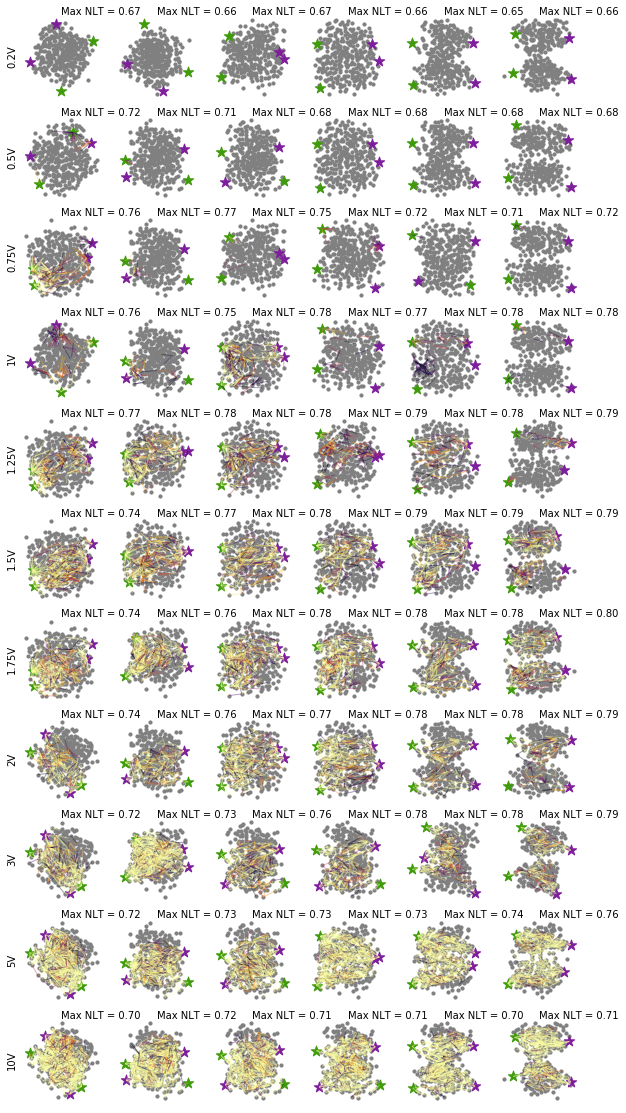

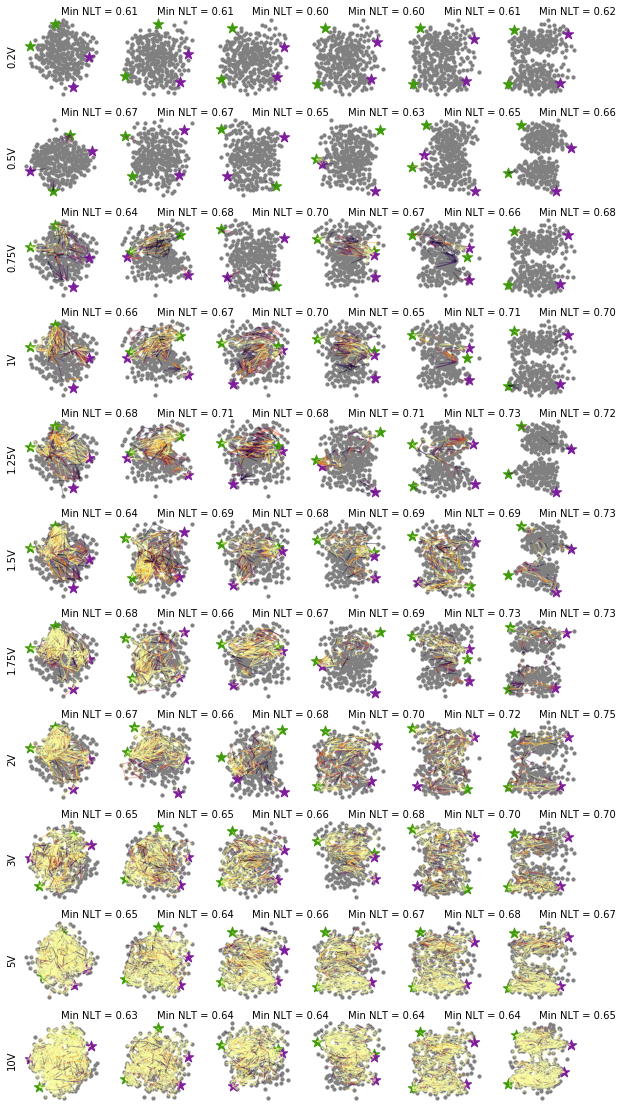

In [246]:
### REMOVE WEIGHTS CLOSE TO ZERO TO SHOW ACTIVE NETWORK:

#Max NLT
fig, axes = plt.subplots(11,6,figsize=(10,20))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph[i]))):         

        #find top + bottom network
        maxNW=np.argmax(newResults[i][j])
        maxNLT=np.max(newResults[i][j])
        ax=axes[i][j]
        G=weightedSubGraph[i][j][maxNW]#current_new[i][j][maxNW]
#         set_trace()
        edge_weights=nx.get_edge_attributes(G,'weight')
        G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-6))
        edges=G.edges()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]

        #Normalize Edge Colors
        cNorm=clrs.SymLogNorm(10,vmin=minWeightsNLT,vmax=maxWeightsNLT)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.inferno)
        colorList=[]
        for k in range(len(weights)):
            colorVal = scalarMap.to_rgba(weights[k])
            colorList.append(colorVal)

        OGgraphMax=nx.from_numpy_array(NWN_networks[j][maxNW])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_ylabel(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=colorList,edge_cmap=plt.cm.inferno,edge_vmin=minWeightsNLT,edge_vmax=maxWeightsNLT,alpha=0.4)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=sources[i][j][maxNW].tolist(),node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=drains[i][j][maxNW].tolist(),node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Max NLT = '+"{0:.2f}".format(maxNLT),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300NWN Modularity MultiTask - Current Weighted REMOVED ZERO WEIGHTS Graphs MAX NLT.pdf',format='pdf',dpi=300)

fig, axes = plt.subplots(11,6,figsize=(10,20))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph[i]))):
        #find top + bottom network
        minNW=np.argmin(newResults[i][j])
        minNLT=np.min(newResults[i][j])
        ax=axes[i][j]
        G=weightedSubGraph[i][j][minNW]#current_new[i][j][minNW]
#         set_trace()
        edge_weights=nx.get_edge_attributes(G,'weight')
        G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-6))
        edges=G.edges()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]

        #Normalize Edge Colors
        cNorm=clrs.SymLogNorm(10,vmin=minWeightsNLT,vmax=maxWeightsNLT)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.inferno)
        colorList=[]
        for k in range(len(weights)):
            colorVal = scalarMap.to_rgba(weights[k])
            colorList.append(colorVal)

        OGgraphMax=nx.from_numpy_array(NWN_networks[j][minNW])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
               ax.set_ylabel(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=colorList,edge_cmap=plt.cm.inferno,edge_vmin=minWeightsNLT,edge_vmax=maxWeightsNLT,alpha=0.4)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=sources[i][j][minNW].tolist(),node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=drains[i][j][minNW].tolist(),node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Min NLT = '+"{0:.2f}".format(minNLT),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300NWN Modularity MultiTask - Current Weighted REMOVED ZERO WEIGHTS Graphs MIN NLT.pdf',format='pdf',dpi=300)



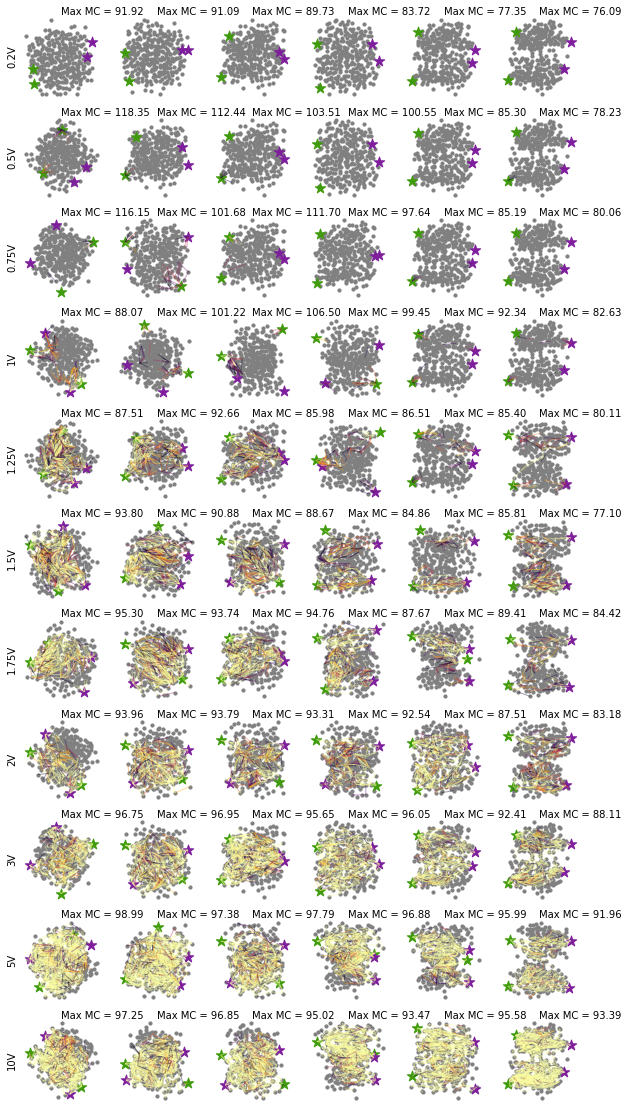

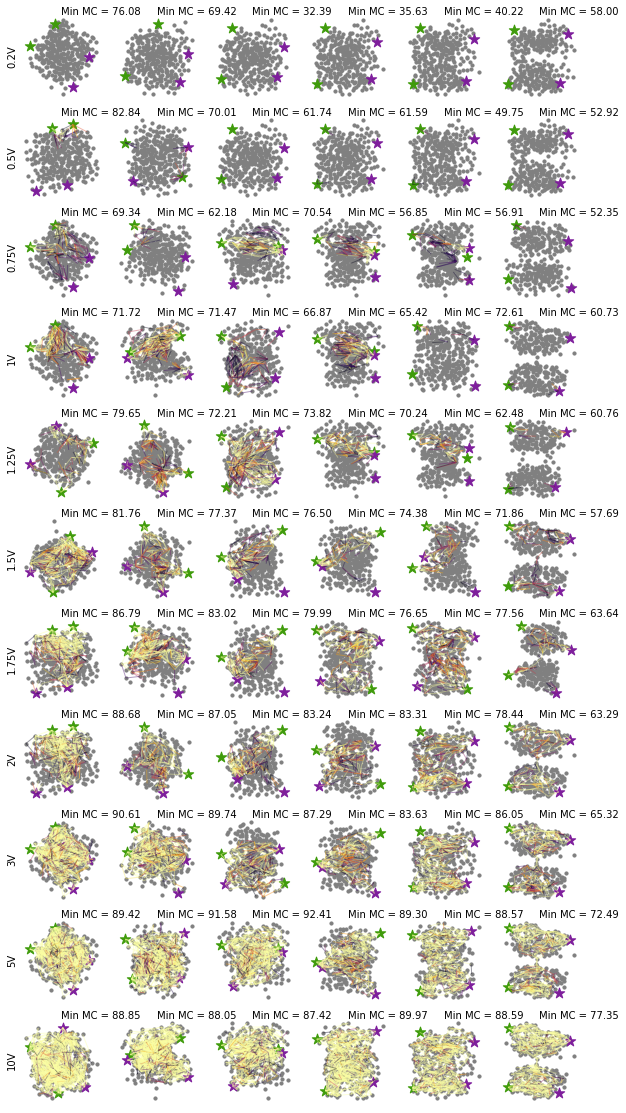

In [247]:
### REMOVE WEIGHTS CLOSE TO ZERO TO SHOW ACTIVE NETWORK:

#Max NLT
fig, axes = plt.subplots(11,6,figsize=(10,20))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph[i]))):         

        #find top + bottom network
        maxNW=np.argmax(newResultsMC[i][j])
        maxMC=np.max(newResultsMC[i][j])
        ax=axes[i][j]
        G=weightedSubGraph[i][j][maxNW]#current_new[i][j][maxNW]
#         set_trace()
        edge_weights=nx.get_edge_attributes(G,'weight')
        G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-6))
        edges=G.edges()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]

        #Normalize Edge Colors
        cNorm=clrs.SymLogNorm(10,vmin=minWeightsMC,vmax=maxWeightsMC)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.inferno)
        colorList=[]
        for k in range(len(weights)):
            colorVal = scalarMap.to_rgba(weights[k])
            colorList.append(colorVal)

        OGgraphMax=nx.from_numpy_array(NWN_networks[j][maxNW])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_ylabel(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=colorList,edge_cmap=plt.cm.inferno,edge_vmin=minWeightsMC,edge_vmax=maxWeightsMC,alpha=0.4)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=sources[i][j][maxNW].tolist(),node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=drains[i][j][maxNW].tolist(),node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Max MC = '+"{0:.2f}".format(maxMC),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300NWN Modularity MultiTask - Current Weighted REMOVED ZERO WEIGHTS Graphs MAX MC.pdf',format='pdf',dpi=300)

fig, axes = plt.subplots(11,6,figsize=(10,20))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph[i]))):
        #find top + bottom network
        minNW=np.argmin(newResultsMC[i][j])
        minMC=np.min(newResultsMC[i][j])
        ax=axes[i][j]
        G=weightedSubGraph[i][j][minNW]#current_new[i][j][minNW]
#         set_trace()
        edge_weights=nx.get_edge_attributes(G,'weight')
        G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-6))
        edges=G.edges()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]

        #Normalize Edge Colors
        cNorm=clrs.SymLogNorm(10,vmin=minWeightsMC,vmax=maxWeightsMC)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.inferno)
        colorList=[]
        for k in range(len(weights)):
            colorVal = scalarMap.to_rgba(weights[k])
            colorList.append(colorVal)

        OGgraphMax=nx.from_numpy_array(NWN_networks[j][minNW])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_ylabel(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=colorList,edge_cmap=plt.cm.inferno,edge_vmin=minWeightsMC,edge_vmax=maxWeightsMC,alpha=0.4)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=sources[i][j][minNW].tolist(),node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=drains[i][j][minNW].tolist(),node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Min MC = '+"{0:.2f}".format(minMC),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300NWN Modularity MultiTask - Current Weighted REMOVED ZERO WEIGHTS Graphs MIN MC.pdf',format='pdf',dpi=300)



In [256]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

NodeNotFound: Either source [ 73 255] or target [115 224] is not in G

## 2 Electrodes in same network - same signal:

In [178]:
name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_9modules_2electrodes_NLT.pkl'
file = open(name, 'rb')
result=pickle.load(file)

name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_9modules_2electrodesNKMAX_MC.pkl'
file = open(name, 'rb')
resultMC=pickle.load(file)[0]

In [179]:
# name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_2modules_2electrodes_NLT.pkl'
# file = open(name, 'rb')
# result2=pickle.load(file)

# name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_2modules_2electrodesNKMAX_MC.pkl'
# file = open(name, 'rb')
# resultMC2=pickle.load(file)

In [180]:
resultMC=np.array(resultMC).reshape(11,60)
result=np.array(result).reshape(11,60)

In [181]:
tempResults=result.reshape(11,10,6)
tempResultsMC=resultMC.reshape((11,10,6))
result=[];resultMC=[]
for i in range(len(tempResults)):
    result.append(tempResults[i].T)
    resultMC.append(tempResultsMC[i].T)

In [182]:
y=np.mean(result,axis=2)
y_mc=np.mean(resultMC,axis=2)
err=np.std(result,axis=2)
err_mc=np.std(resultMC,axis=2)

# y2=np.mean(result2,axis=2)
# y_mc2=np.mean(resultMC2,axis=2)
# err2=np.std(result2,axis=2)
# err_mc2=np.std(resultMC2,axis=2)

x=onAmp

In [150]:
#Define Save Location
saveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'

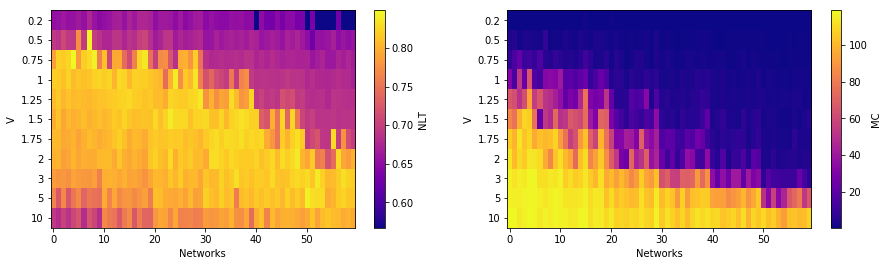

In [137]:
#Voltage vs NLT:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,2,figsize=(15,4))
fig.subplots_adjust(wspace=0.2)
ax=axes[0]
a=ax.imshow(np.array(result).reshape(11,60),aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Networks')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLT')

ax=axes[1]
a=ax.imshow(np.array(resultMC).reshape(11,60),aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Networks')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='MC')

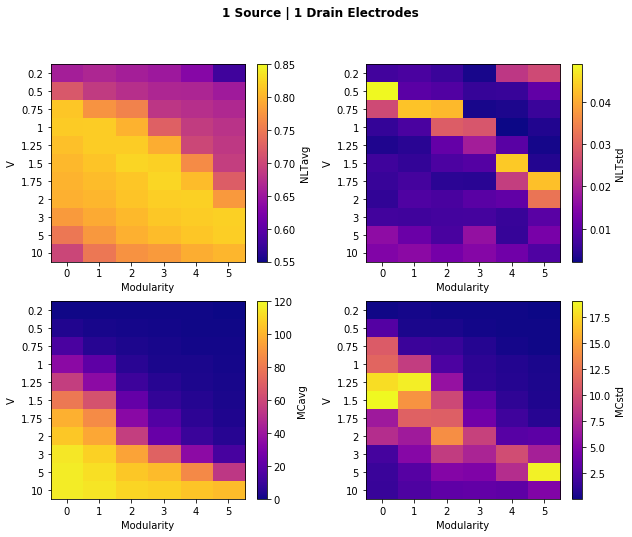

In [183]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('1 Source | 1 Drain Electrodes',weight='bold')
ax=axes[0][0]
a=ax.imshow(y,aspect='auto',cmap=plt.cm.plasma,vmin=0.55,vmax=0.85)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(x)

plt.colorbar(a,ax=ax,label='NLTavg')

ax=axes[0][1]
#Voltage vs Density (std across 10 networks for each combination):
b=ax.imshow(err,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='NLTstd')

ax=axes[1][0]
c=ax.imshow(y_mc,aspect='auto',cmap=plt.cm.plasma,vmin=0,vmax=120)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(x)

plt.colorbar(c,ax=ax,label='MCavg')

ax=axes[1][1]
#Voltage vs Density (std across 10 networks for each combination):
d=ax.imshow(err_mc,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(d,ax=ax,label='MCstd')
plt.savefig(saveLoc+'2 Electrodes NLT + MC Performance - VSweep 300NWN Varying Modularity 9Modules.pdf',format='pdf',dpi=300)

NameError: name 'y2' is not defined

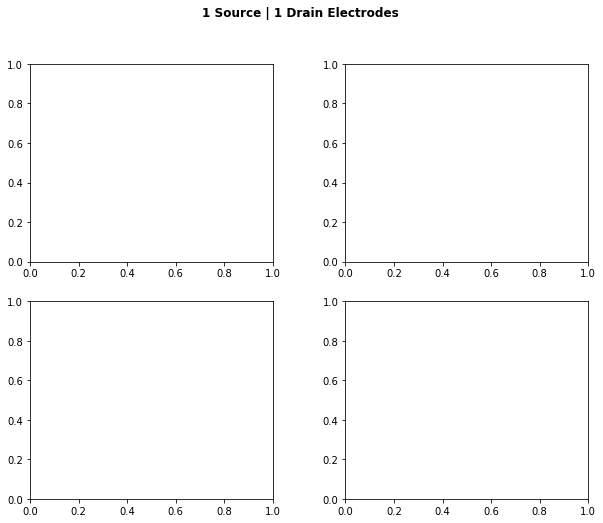

In [88]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('1 Source | 1 Drain Electrodes',weight='bold')
ax=axes[0][0]
a=ax.imshow(y2,aspect='auto',cmap=plt.cm.plasma,vmin=0.55,vmax=0.85)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(x)

plt.colorbar(a,ax=ax,label='NLTavg')

ax=axes[0][1]
#Voltage vs Density (std across 10 networks for each combination):
b=ax.imshow(err2,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='NLTstd')

ax=axes[1][0]
c=ax.imshow(y_mc2,aspect='auto',cmap=plt.cm.plasma,vmin=0,vmax=120)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(x)

plt.colorbar(c,ax=ax,label='MCavg')

ax=axes[1][1]
#Voltage vs Density (std across 10 networks for each combination):
d=ax.imshow(err_mc2,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(d,ax=ax,label='MCstd')
plt.savefig(saveLoc+'2 Electrodes NLT + MC Performance - VSweep 300NWN Varying Modularity 2Modules.pdf',format='pdf',dpi=300)

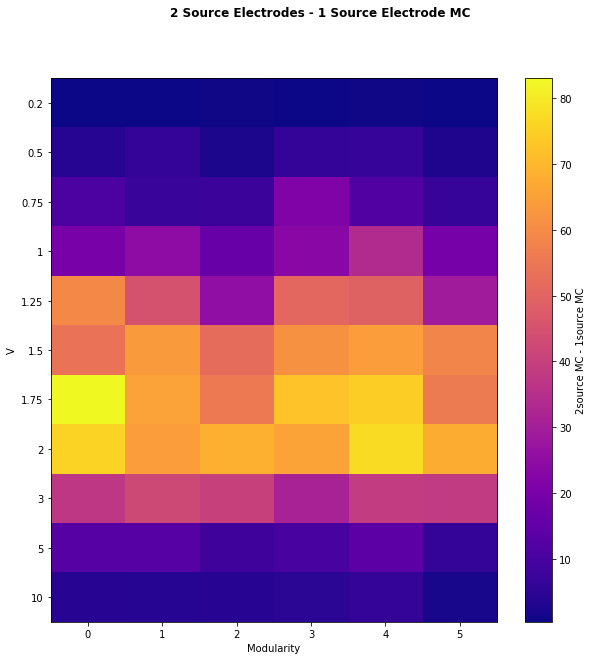

In [29]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,1,figsize=(10,10))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('2 Source Electrodes - 1 Source Electrode MC',weight='bold')

ax=axes
b=ax.imshow(y_mc-y_mc2,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='2source MC - 1source MC')
plt.savefig(saveLoc+'4 Electrodes - 2 Electrode MC Performance - VSweep 300NWN Varying Modularity 2Modules.pdf',format='pdf',dpi=300)

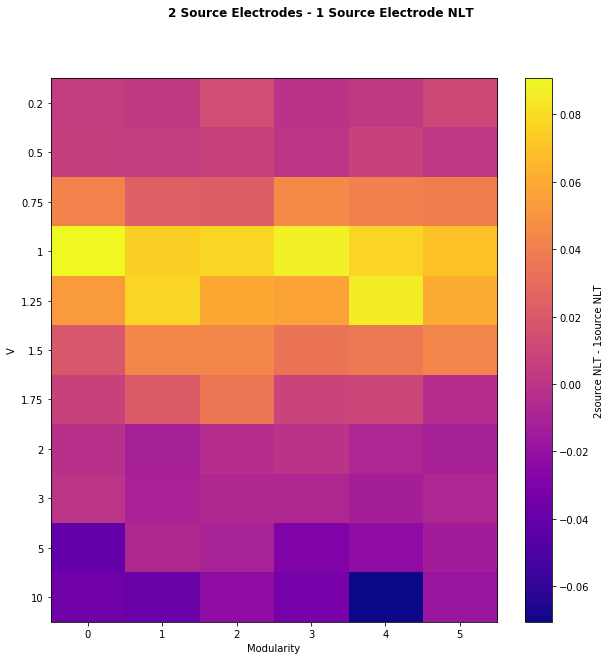

In [30]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,1,figsize=(10,10))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('2 Source Electrodes - 1 Source Electrode NLT',weight='bold')

ax=axes
b=ax.imshow(y-y2,aspect='auto',cmap=plt.cm.plasma)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='2source NLT - 1source NLT')
plt.savefig(saveLoc+'4 Electrodes - 2 Electrode NLT Performance - VSweep 300NWN Varying Modularity 2Modules.pdf',format='pdf',dpi=300)

In [176]:
name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_9modules_2electrodes_NLT.pkl'
# if (not os.path.isfile(name)): #if we haven't saved the file
print('Saving Max Min Accuracies')
with open(name, 'wb') as f:
    pickle.dump([result], f)   
print('Saved')

Saving Max Min Accuracies
Saved


In [177]:
name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Networks_NWN_9modules_2electrodesNKMAX_MC.pkl'
# if (not os.path.isfile(name)): #if we haven't saved the file
print('Saving Max Min Accuracies')
with open(name, 'wb') as f:
    pickle.dump([resultMC], f)   
print('Saved')

Saving Max Min Accuracies
Saved


In [165]:
1

1